In [1]:
import os

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sweetviz as sv

c:\Users\Giancarlo\Documents\Insper\9_Semestre\ML\projeto\ml-final-project\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
os.chdir("..")

from src.preprocessing import preprocess_data

In [3]:
df = pd.read_csv('./data/ev_charging_patterns.csv')
df.head()

User ID Vehicle Model  Battery Capacity (kWh) Charging Station ID  \
0  User_1        BMW i3              108.463007         Station_391   
1  User_2  Hyundai Kona              100.000000         Station_428   
2  User_3    Chevy Bolt               75.000000         Station_181   
3  User_4  Hyundai Kona               50.000000         Station_327   
4  User_5  Hyundai Kona               50.000000         Station_108   

  Charging Station Location  Charging Start Time    Charging End Time  \
0                   Houston  2024-01-01 00:00:00  2024-01-01 00:39:00   
1             San Francisco  2024-01-01 01:00:00  2024-01-01 03:01:00   
2             San Francisco  2024-01-01 02:00:00  2024-01-01 04:48:00   
3                   Houston  2024-01-01 03:00:00  2024-01-01 06:42:00   
4               Los Angeles  2024-01-01 04:00:00  2024-01-01 05:46:00   

   Energy Consumed (kWh)  Charging Duration (hours)  Charging Rate (kW)  \
0              60.712346                   0.591363           36.389181   
1              12.339275                   3.133652           30.677735   
2              19.128876                   2.452653           27.513593   
3              79.457824                   1.266431           32.882870   
4              19.629104                   2.019765           10.215712   

   Charging Cost (USD) Time of Day Day of Week  State of Charge (Start %)  \
0            13.087717     Evening     Tuesday                  29.371576   
1            21.128448     Morning      Monday                  10.115778   
2            35.667270     Morning    Thursday                   6.854604   
3            13.036239     Evening    Saturday                  83.120003   
4            10.161471     Morning    Saturday                  54.258950   

   State of Charge (End %)  Distance Driven (since last charge) (km)  \
0                86.119962                                293.602111   
1                84.664344                                112.112804   
2                69.917615                                 71.799253   
3                99.624328                                199.577785   
4                63.743786                                203.661847   

   Temperature (°C)  Vehicle Age (years)     Charger Type  \
0         27.947953                  2.0  DC Fast Charger   
1         14.311026                  3.0          Level 1   
2         21.002002                  2.0          Level 2   
3         38.316313                  1.0          Level 1   
4         -7.834199                  1.0          Level 1   

                User Type  
0                Commuter  
1           Casual Driver  
2                Commuter  
3  Long-Distance Traveler  
4  Long-Distance Traveler

In [4]:
df_processed = preprocess_data(df)
df_processed.head()

Vehicle Model  Battery Capacity (kWh) Charging Station Location  \
1  Hyundai Kona                   100.0             San Francisco   
3  Hyundai Kona                    50.0                   Houston   
4  Hyundai Kona                    50.0               Los Angeles   
5   Nissan Leaf                    50.0             San Francisco   
7    Chevy Bolt                    75.0               Los Angeles   

   Energy Consumed (kWh)  Charging Duration (hours)  Charging Rate (kW)  \
1              12.339275                   3.133652           30.677735   
3              79.457824                   1.266431           32.882870   
4              19.629104                   2.019765           10.215712   
5              43.181137                   1.167640           14.334523   
7              51.467617                   2.655396           26.702908   

   Charging Cost (USD) Time of Day Day of Week  State of Charge (Start %)  \
1            21.128448     Morning      Monday                  10.115778   
3            13.036239     Evening    Saturday                  83.120003   
4            10.161471     Morning    Saturday                  54.258950   
5            36.900341     Evening    Saturday                  75.217748   
7             9.796821   Afternoon      Monday                  56.201703   

   State of Charge (End %)  Distance Driven (since last charge) (km)  \
1                84.664344                                112.112804   
3                99.624328                                199.577785   
4                63.743786                                203.661847   
5                71.982288                                143.680046   
7                63.786815                                116.543166   

   Temperature (°C)  Vehicle Age (years)     Charger Type  \
1         14.311026                  3.0          Level 1   
3         38.316313                  1.0          Level 1   
4         -7.834199                  1.0          Level 1   
5         -5.274218                  0.0  DC Fast Charger   
7         -4.417460                  0.0          Level 2   

                User Type  
1           Casual Driver  
3  Long-Distance Traveler  
4  Long-Distance Traveler  
5  Long-Distance Traveler  
7  Long-Distance Traveler

In [5]:
report = sv.analyze(df_processed)
report.show_html("report.html")

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:01 -> (00:00 left)    


Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [6]:
feature_column = "User Type"

In [7]:
categorical_features = [
    "Vehicle Model",
    "Charging Station Location",
    "Time of Day",
    "Day of Week",
    "Charger Type",
]

In [8]:
numerical_features = df_processed.columns.difference(categorical_features + [feature_column])
numerical_features

Index(['Battery Capacity (kWh)', 'Charging Cost (USD)',
       'Charging Duration (hours)', 'Charging Rate (kW)',
       'Distance Driven (since last charge) (km)', 'Energy Consumed (kWh)',
       'State of Charge (End %)', 'State of Charge (Start %)',
       'Temperature (°C)', 'Vehicle Age (years)'],
      dtype='object')

## Numerical features

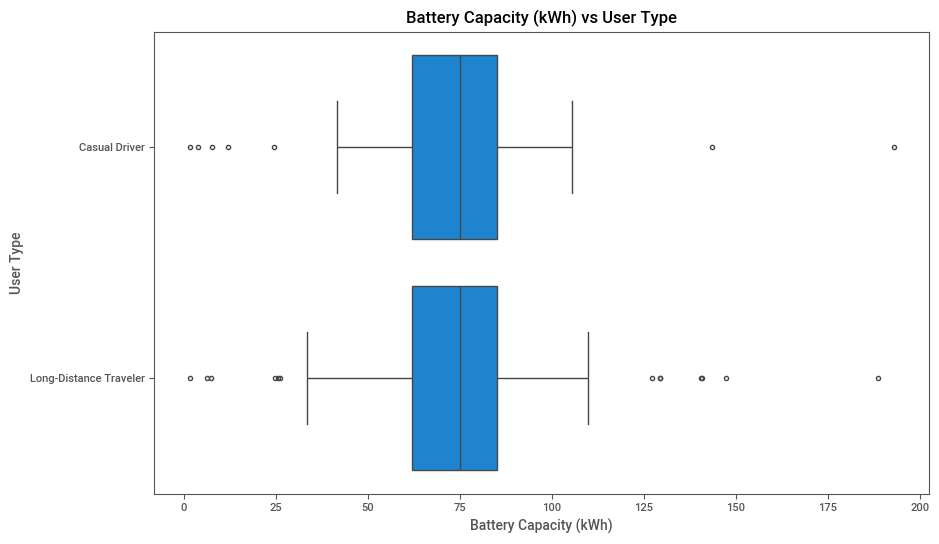

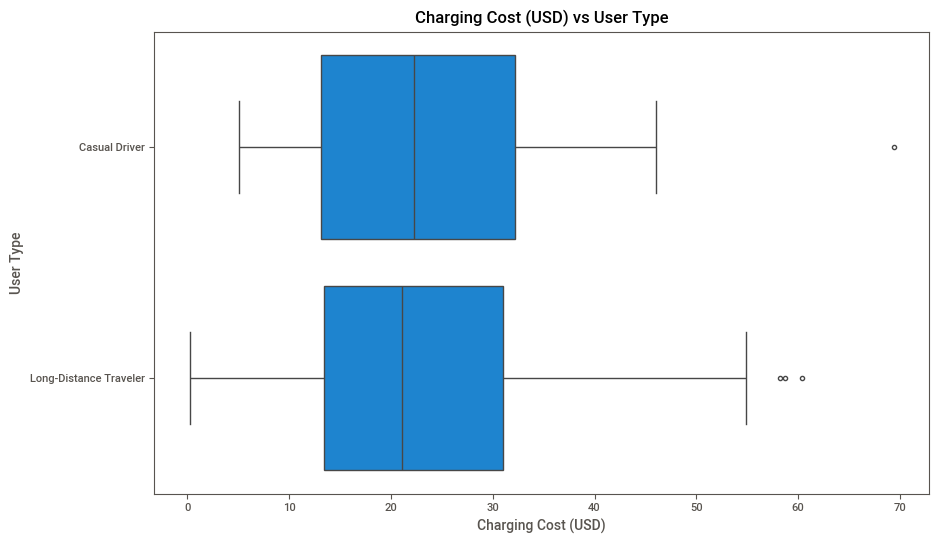

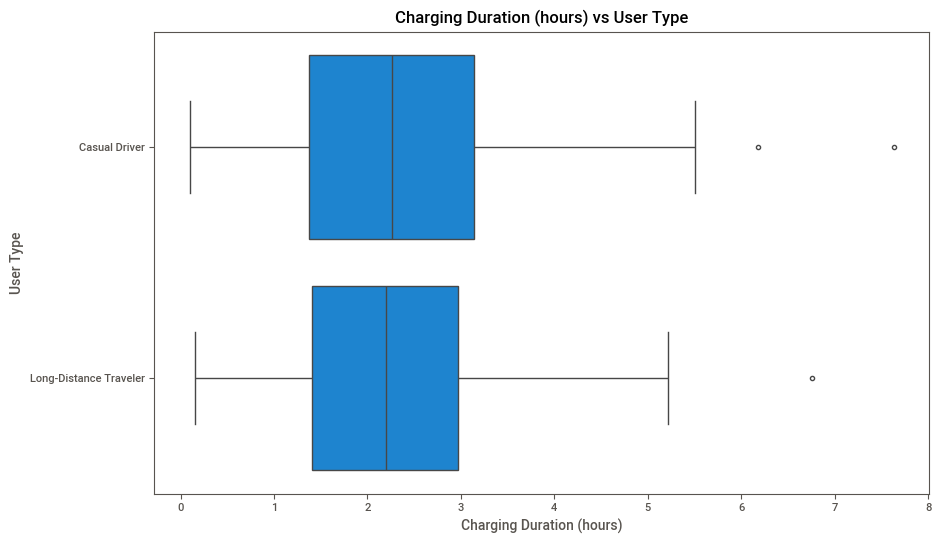

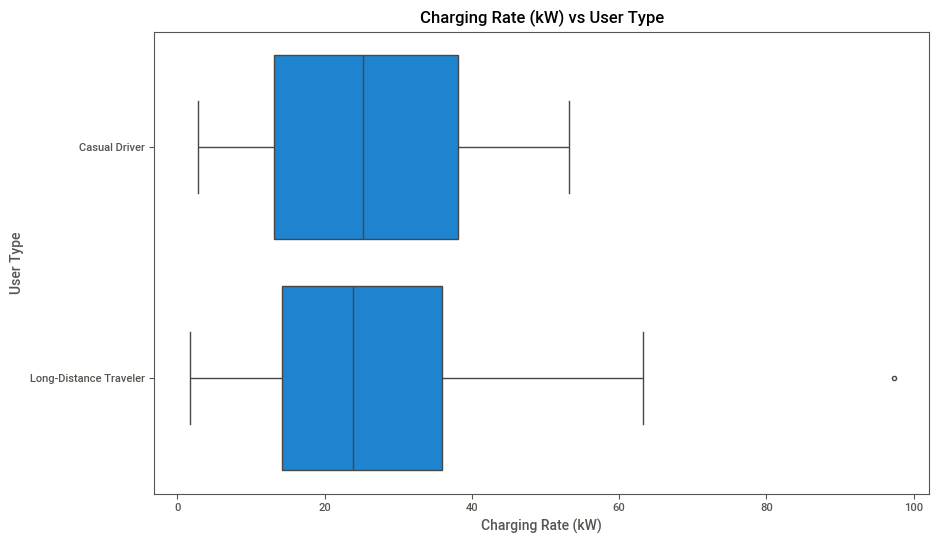

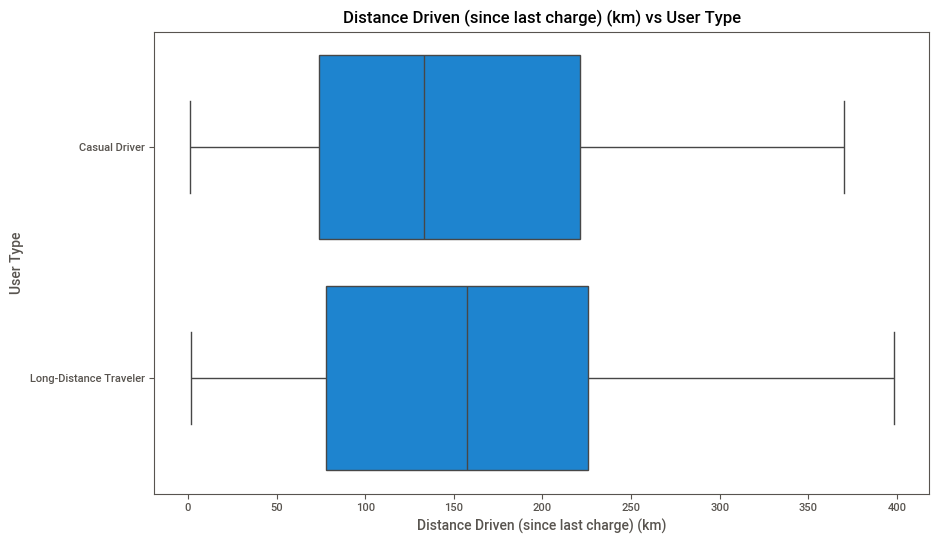

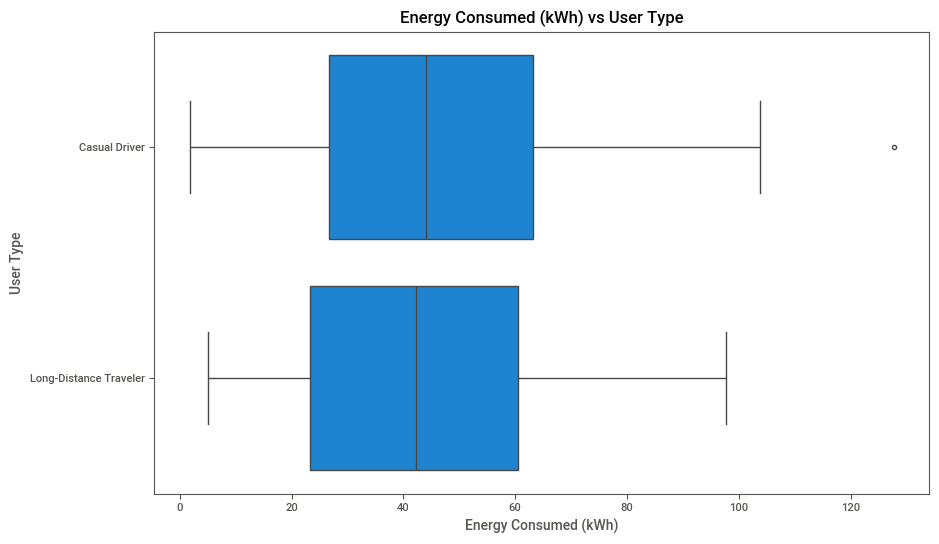

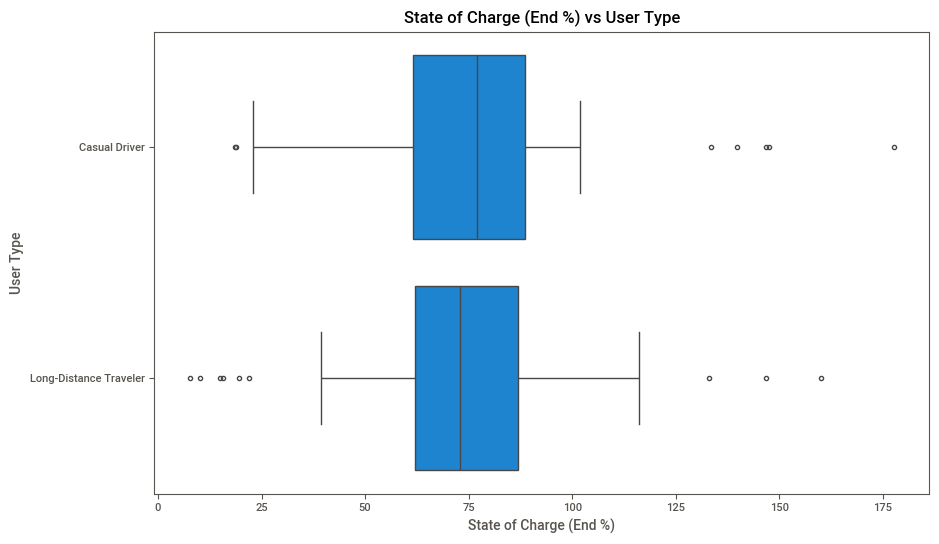

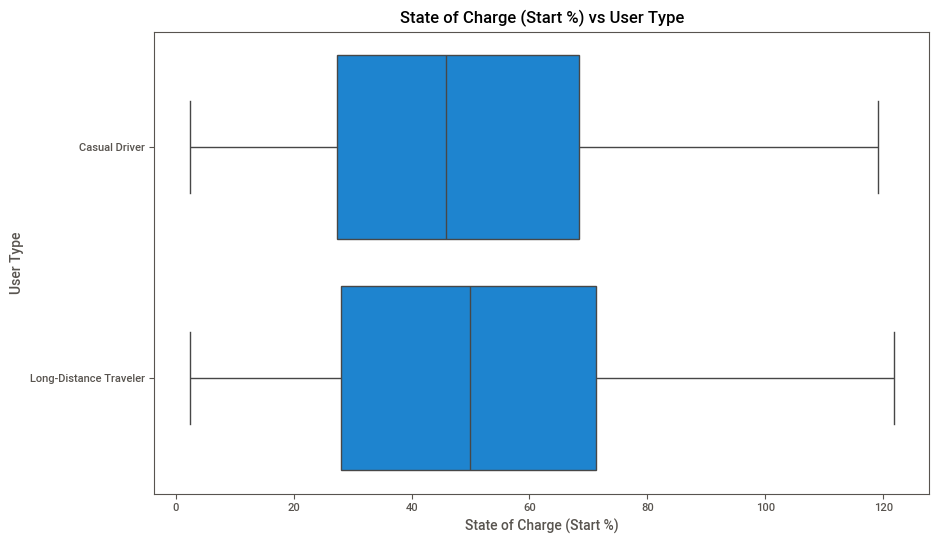

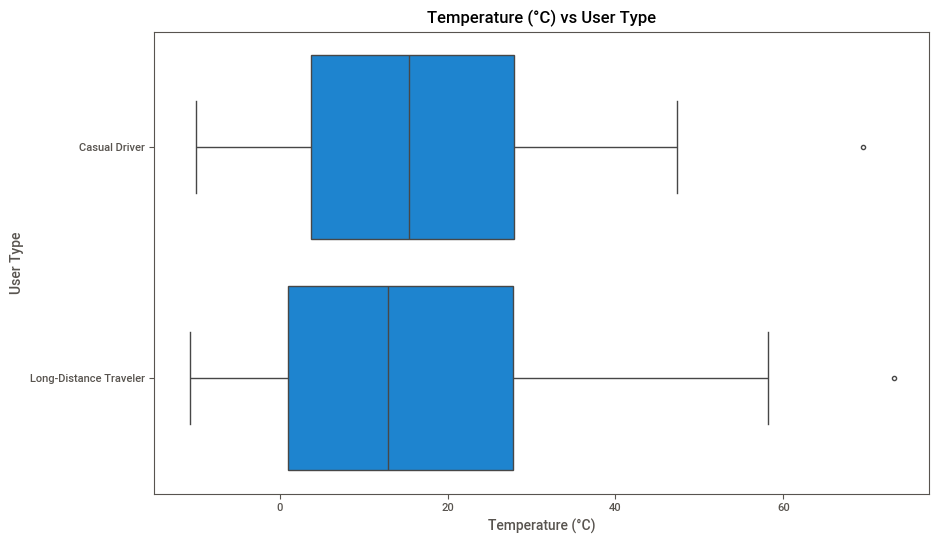

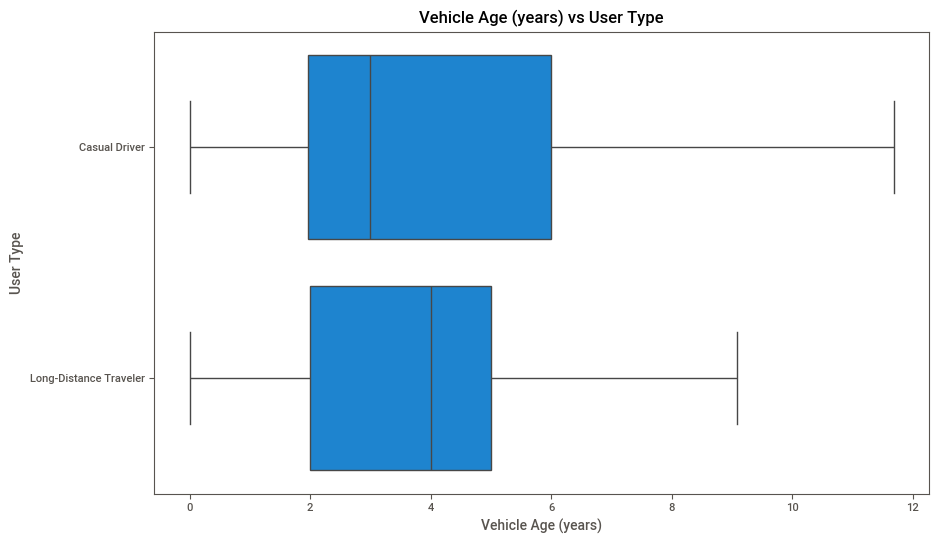

In [9]:
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=feature, y=feature_column, data=df_processed)
    plt.title(f"{feature} vs {feature_column}")
    plt.show()

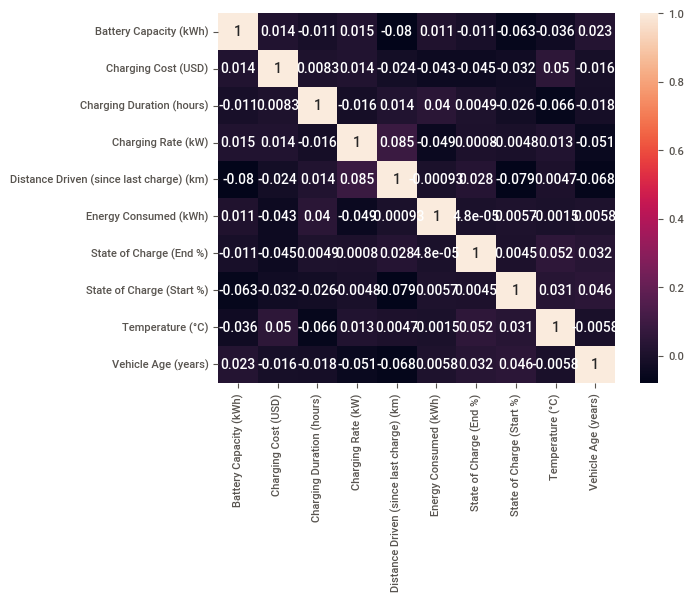

In [10]:
corr = df_processed[numerical_features].corr()
sns.heatmap(corr, annot=True)
plt.show()

## Categorical Features

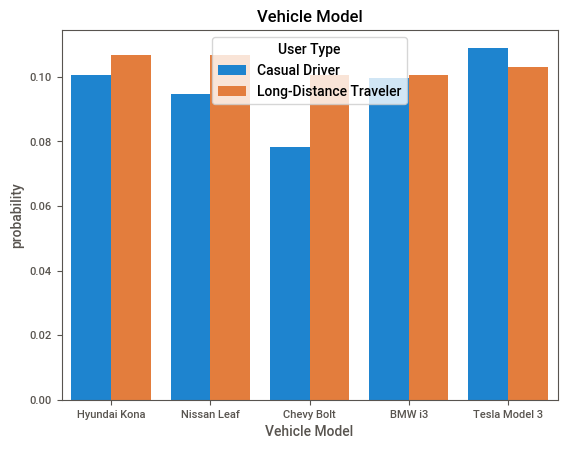

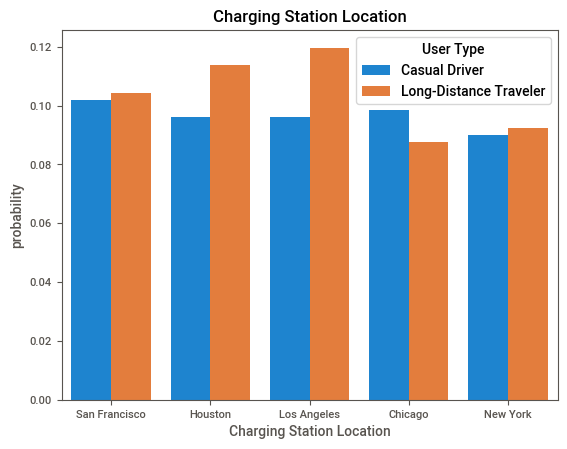

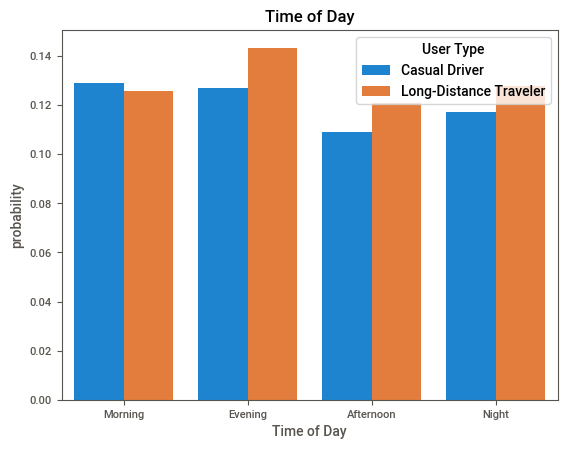

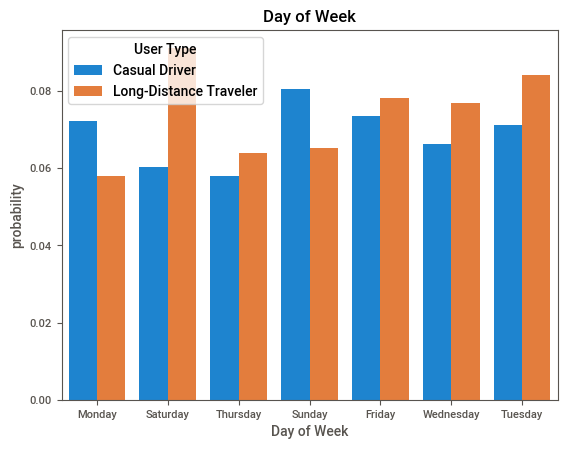

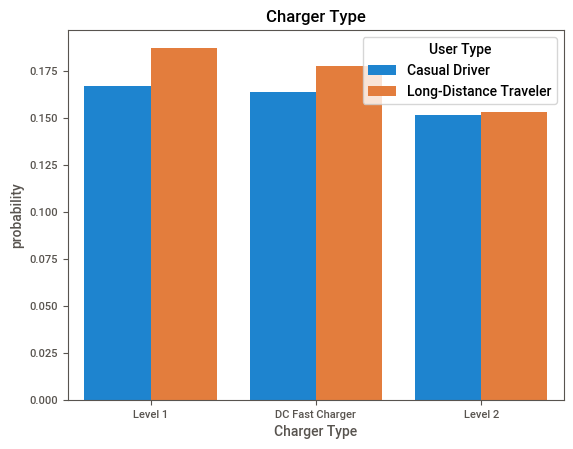

In [11]:
for feature in categorical_features:
    sns.countplot(x=feature, data=df_processed, hue=feature_column, stat="probability")
    plt.title(feature)
    plt.show()

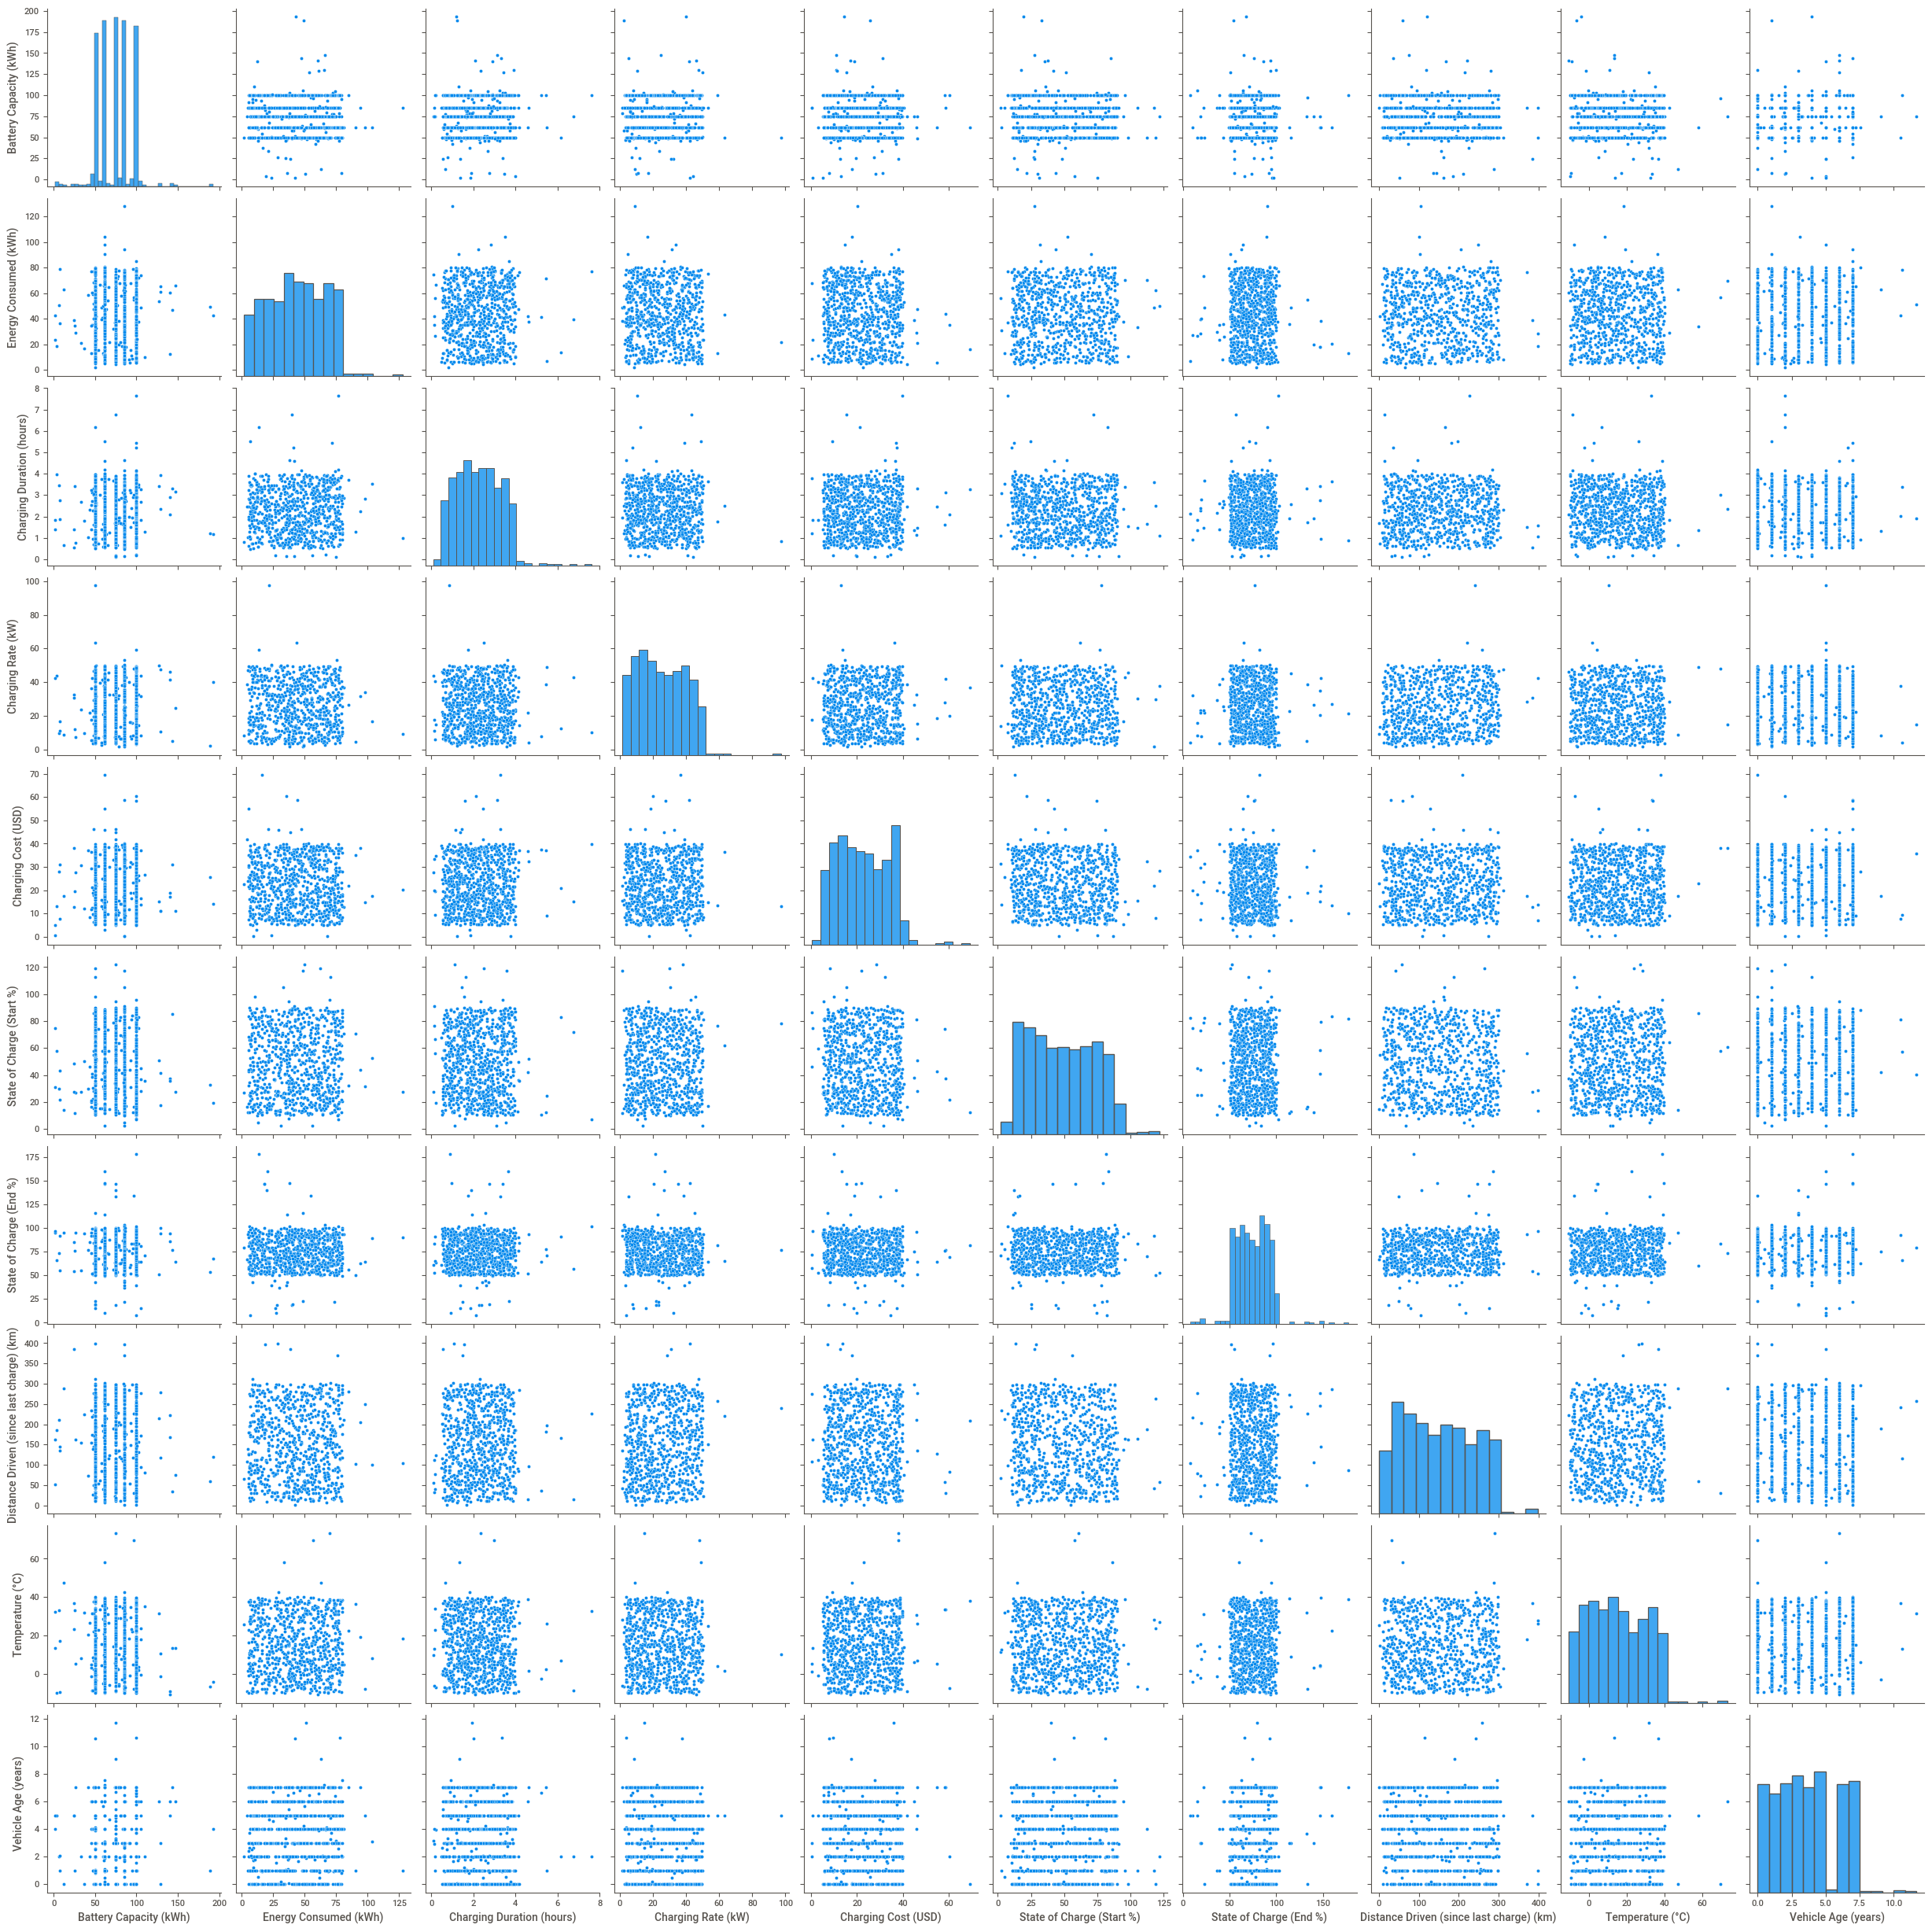

In [12]:
sns.pairplot(df_processed)
plt.show()

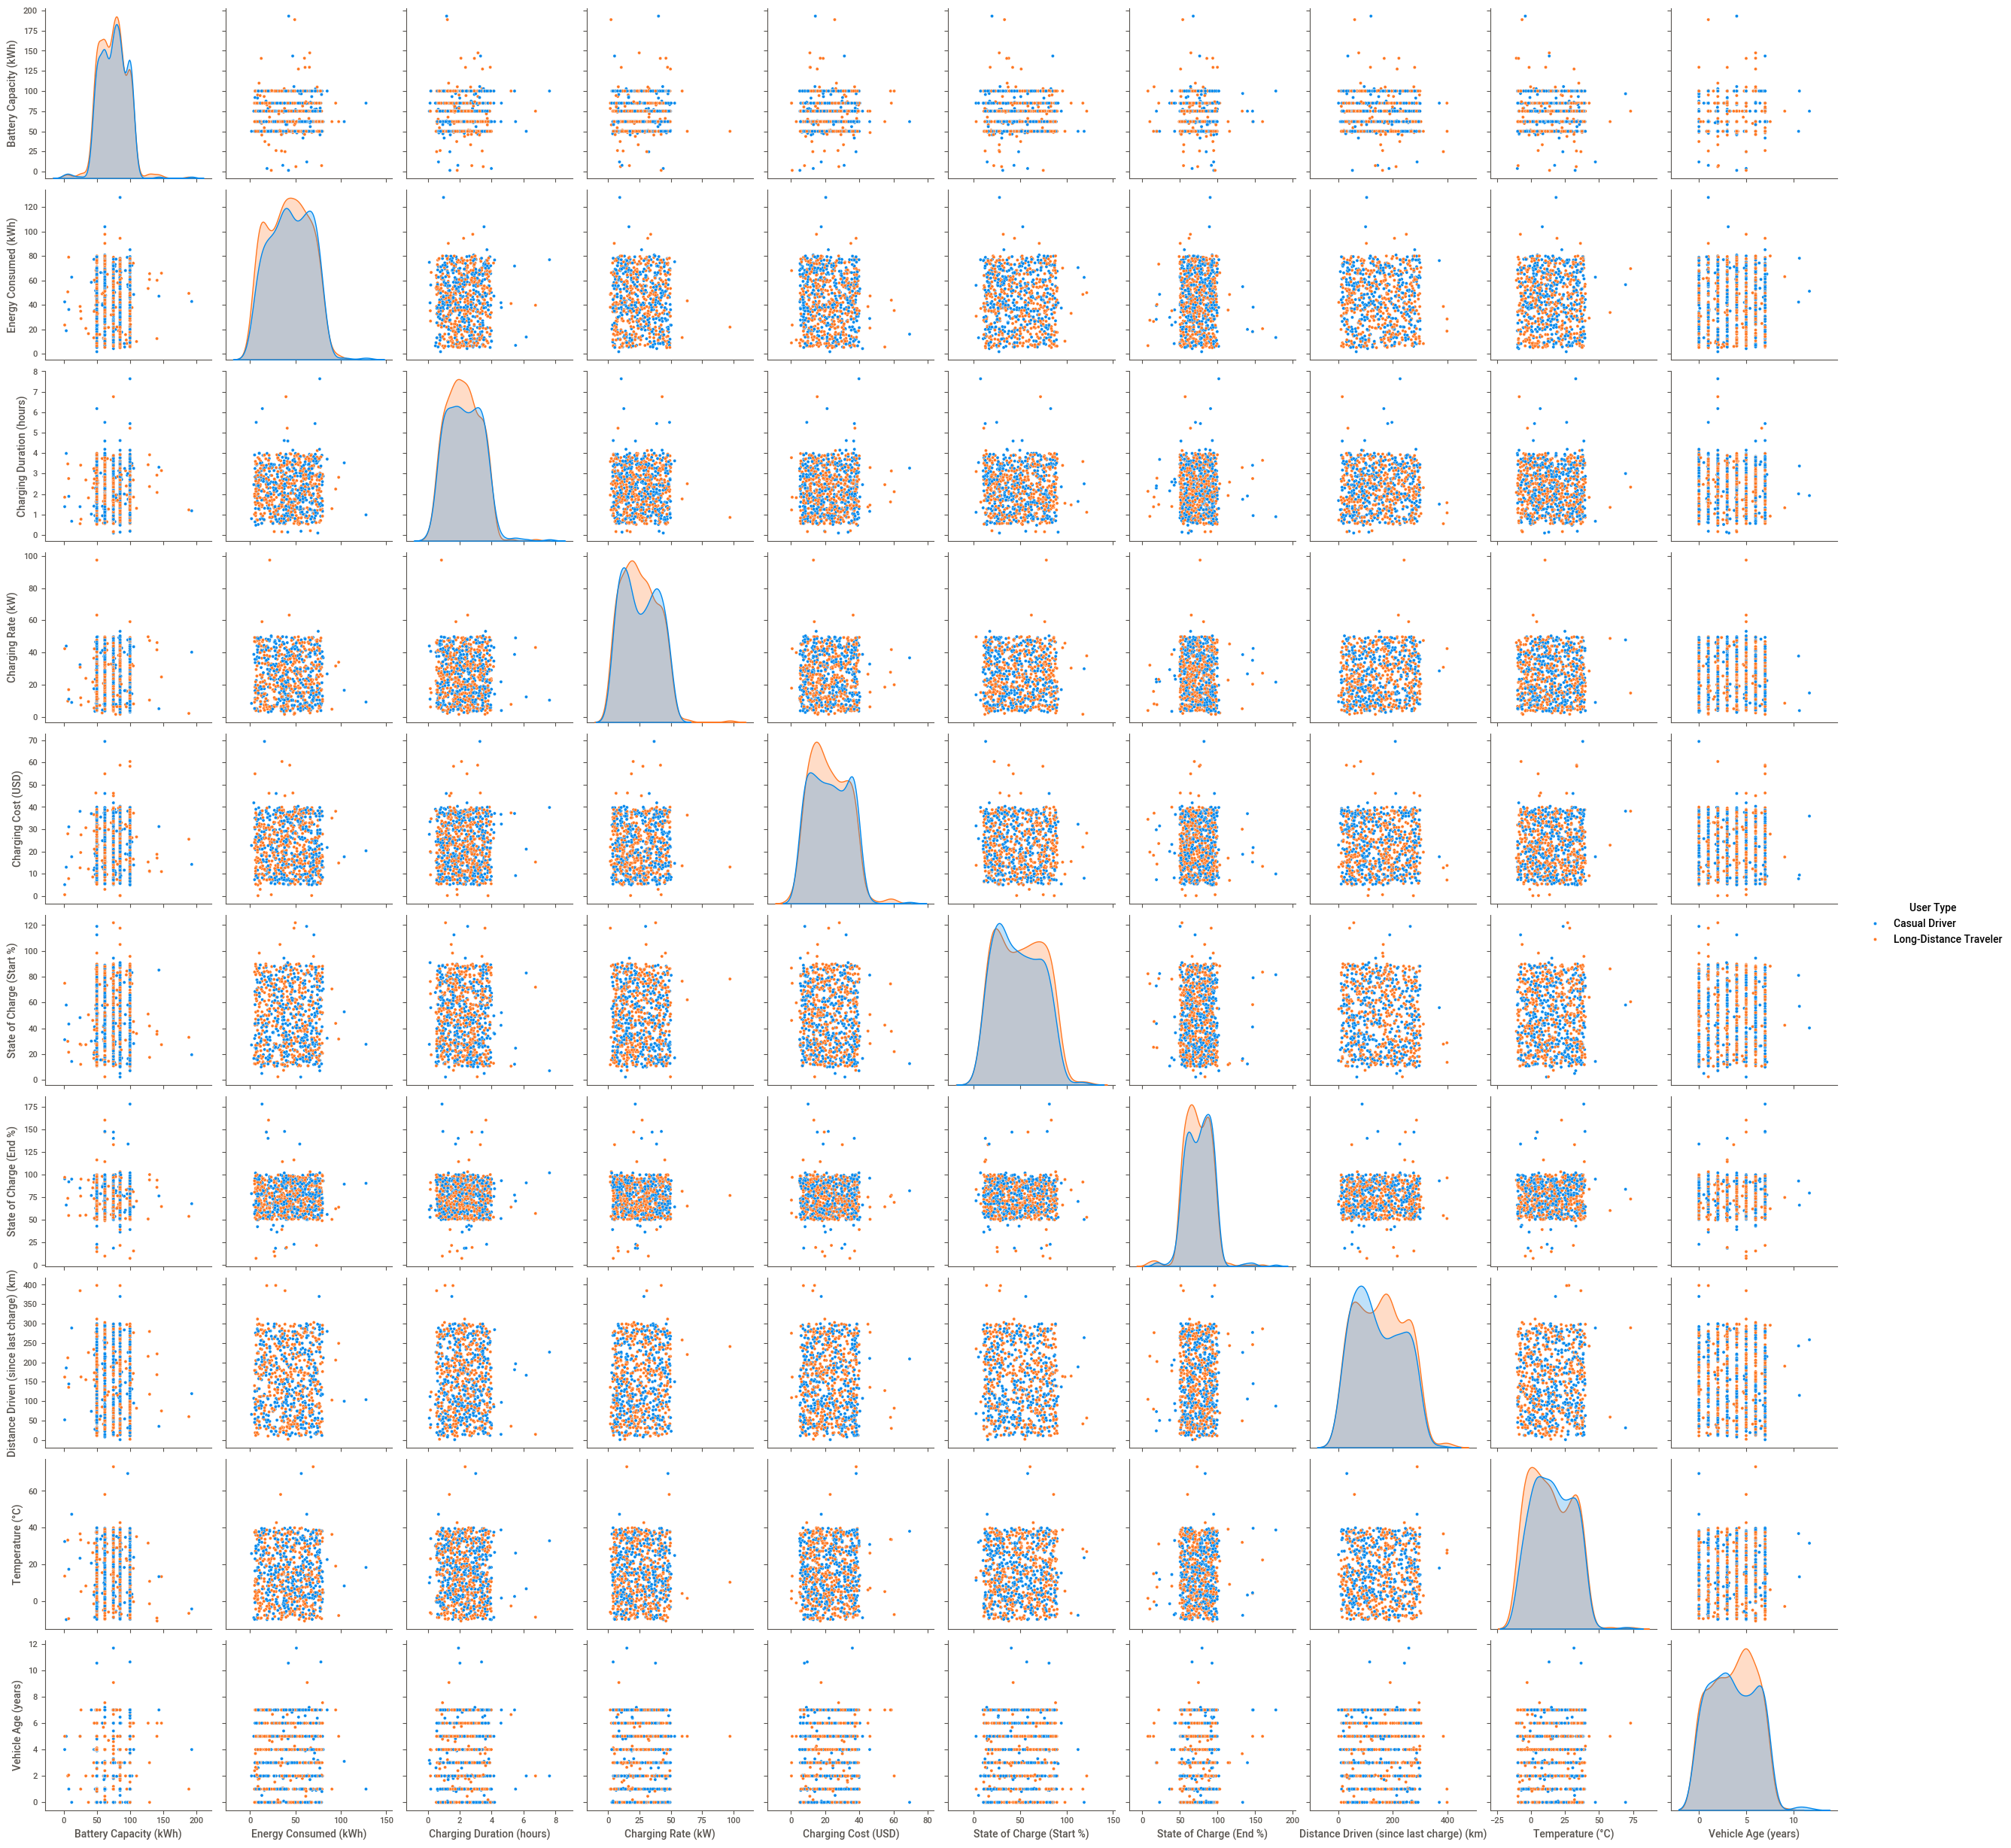

In [13]:
sns.pairplot(df_processed, hue=feature_column)
plt.show()